In [1]:
import pandas as pd
import seaborn as sns

In [12]:
hormones = ['ABA', 'ACC', 'Cytokinin', 'GA', 'IAA']
dfs = []
for hormone in hormones:
    pareto_df = pd.read_csv(hormone + '-pareto.csv')
    na_df = pd.read_csv(hormone + '-na.csv')
    na_df = na_df[na_df['Tissue'] == 'root']
    pareto_df['Na/K.ratio'] = na_df['Na/K.ratio']
    #df = pd.merge(pareto_df, na_df, on=['Accession', 'Condition'])
    #print(df)
    dfs.append(pareto_df)

full_df = pd.concat(dfs).dropna()
full_df = full_df[['Accession', 'Condition', 'Day', 'Distance.squared', 'Alpha', 'Na/K.ratio']]
#full_df = full_df.groupby(['Accession', 'Condition', 'Day']).agg('mean').reset_index()
print(full_df)

   Accession Condition Day  Distance.squared  Alpha  Na/K.ratio
0     la1511   S+10aba   9          0.020683   0.46    1.610697
1     la1511   S+10aba   9          0.000000   0.27    2.364976
2     la1511   S+10aba   9          0.000874   0.28    2.416271
3     la1511   S+10aba   9          0.000000   0.53    3.674694
4     la1511   S+10aba   9          0.007062   0.47    3.061611
..       ...       ...  ..               ...    ...         ...
20    la1511   S+noiaa   9          6.064108   0.76    1.205469
21    la1511   S+noiaa   9          0.002648   0.37    1.319590
22    la1511   S+noiaa   9          3.725407   0.86    1.181649
23    la1511   S+noiaa   9         16.404792   0.86    1.211286
24    la1511   S+noiaa   9          3.388572   0.79    1.232564

[285 rows x 6 columns]


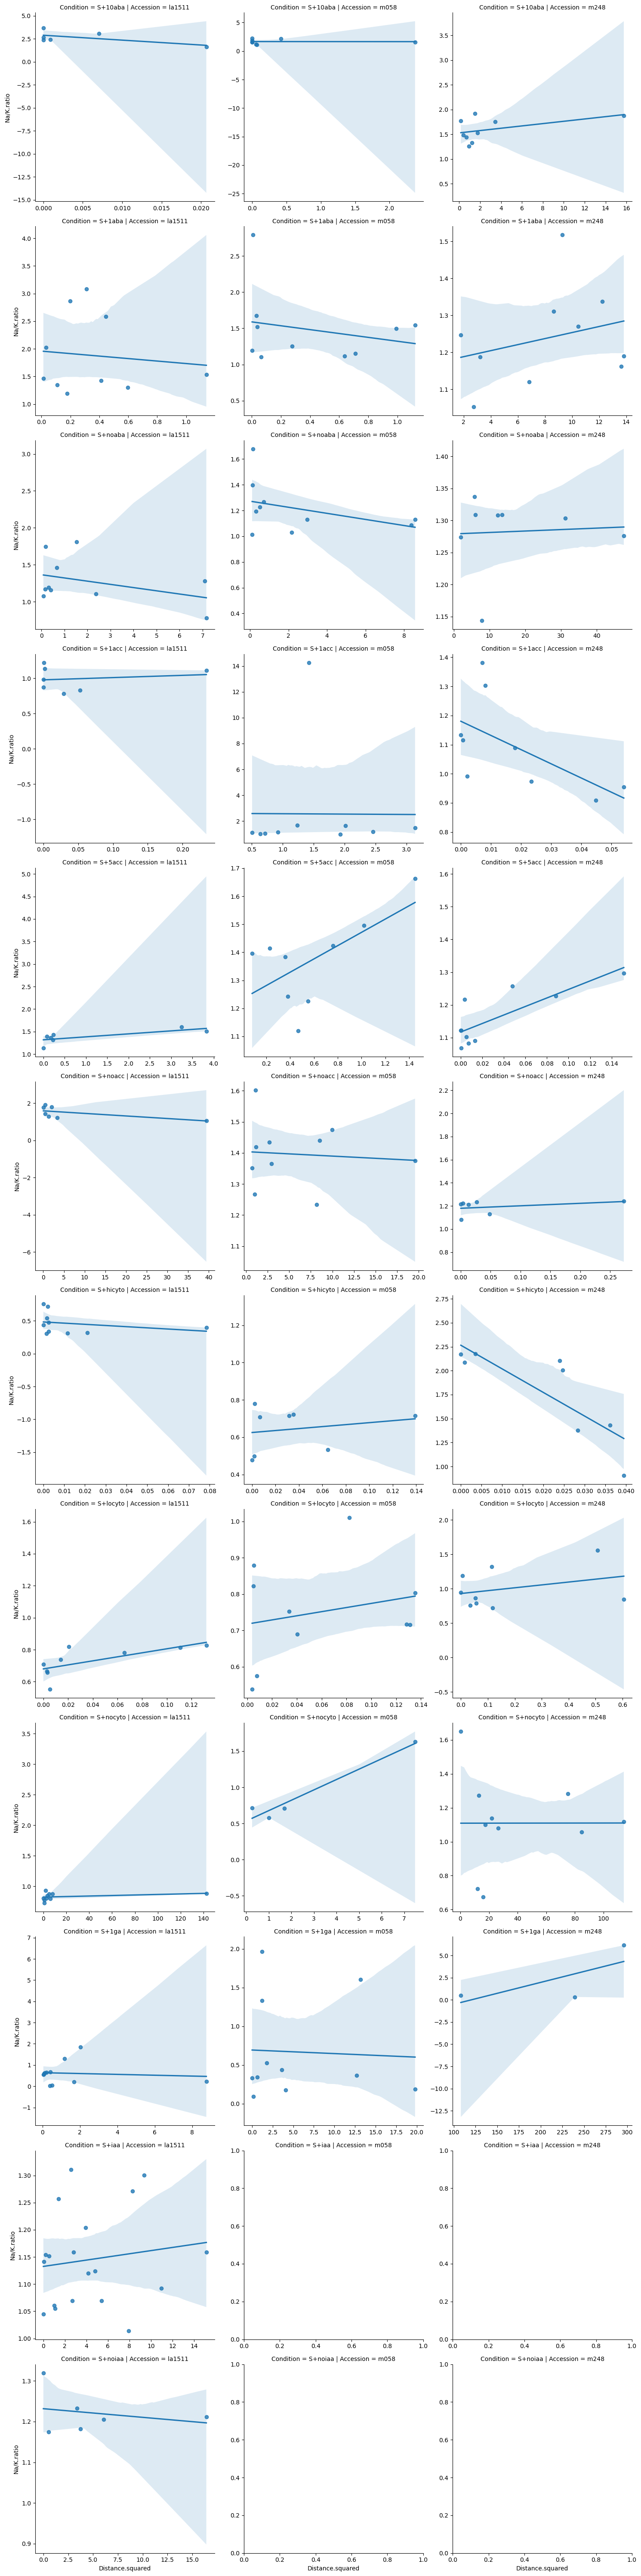

In [19]:
sns.lmplot(x='Distance.squared', 
           y='Na/K.ratio', 
           col='Accession',
           row='Condition',
           data=full_df, 
           facet_kws={'sharex' : False, 'sharey' : False})